In [1]:
from src.libs.lib import *
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_original = pd.read_csv("src/data/tabela_ocorrencias_dbpx_com_a_pontuação_academia.csv")

#2.6s

Hash numérica de 5 dígitos: 94799


In [2]:
import pandas as pd
import io

def gerar_metadados_df(df: pd.DataFrame, amostragem: int = 5):
    print("=== DTYPE DAS COLUNAS ===")
    print(df.dtypes)
    
    print("\n=== DESCRIBE (INCLUINDO OBJETOS) ===")
    try:
        describe_df = df.describe(include='all', datetime_is_numeric=True).transpose()
    except TypeError:
        describe_df = df.describe(include='all').transpose()
    print(describe_df)

    print("\n=== PRIMEIRAS LINHAS ===")
    print(df.head(amostragem))

    print("\n=== INFO COMPLETA ===")
    buffer = io.StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())

    print("\n=== VALORES NULOS POR COLUNA ===")
    print(df.isnull().sum())

    print("\n=== AMOSTRA ESTRATIFICADA POR 'description' (se existir) ===")
    if 'description' in df.columns:
        amostra_estratificada = df.groupby('description').apply(lambda x: x.sample(min(len(x), 3), random_state=42)).reset_index(drop=True)
        print(amostra_estratificada)
    else:
        print("Coluna 'description' não encontrada para amostragem estratificada.")

    # Salvando arquivos para facilitar exportação
    df.dtypes.to_csv("dtypes.csv")
    describe_df.to_csv("describe.csv")
    df.head(amostragem).to_csv("head.csv")
    df.isnull().sum().to_csv("missing_values.csv")

    if 'description' in df.columns:
        amostra_estratificada.to_csv("amostra_estratificada.csv")

In [3]:
gerar_metadados_df(df_original)

=== DTYPE DAS COLUNAS ===
occurence_create          object
contract_start            object
driver_id                  int64
contract_id              float64
description               object
observation               object
Pontuação                 object
Pontuação Atualização    float64
Pontuação Comitê         float64
dtype: object

=== DESCRIBE (INCLUINDO OBJETOS) ===
                         count unique                  top   freq  \
occurence_create         67554  15813  2024-09-06 18:00:00    105   
contract_start           67554  13159  2024-07-01 08:00:00    128   
driver_id              67554.0    NaN                  NaN    NaN   
contract_id            67554.0    NaN                  NaN    NaN   
description              67554     46        Dia agenciado  64321   
observation              67554    121                    1  18234   
Pontuação                67546    128                 -1.0  18234   
Pontuação Atualização  67492.0    NaN                  NaN    NaN   
Pont

/tmp/ipykernel_44508/470857207.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra_estratificada = df.groupby('description').apply(lambda x: x.sample(min(len(x), 3), random_state=42)).reset_index(drop=True)


In [4]:
# Com base na descrição dos dados do df_original
# gerar codigo python para gerar as tabelas com os valores de describe de cada coluna possivel
# Exibir uma tabela bonita usando as bibliotecas pandas e matplotlib
# Ja deixar o código pronto para rodar
# Usar o display do pandas para exibir as tabelas
# Não usar imagens nesta etapa

In [5]:
import pandas as pd
from IPython.display import display

# --- Conversão de tipos com segurança ---
df_original = df_original.copy()

# Converte colunas que devem ser numéricas
df_original['Pontuação'] = pd.to_numeric(df_original['Pontuação'], errors='coerce')

# Converte colunas de data
df_original['occurence_create'] = pd.to_datetime(df_original['occurence_create'], errors='coerce')
df_original['contract_start'] = pd.to_datetime(df_original['contract_start'], errors='coerce')

# --- Describe numérico ---
describe_num = df_original.select_dtypes(include='number').describe().transpose()
print("📊 Estatísticas Descritivas - Variáveis Numéricas")
display(describe_num)

# --- Describe categórico ---
describe_cat = df_original.select_dtypes(include='object').describe().transpose()
print("\n🔤 Estatísticas Descritivas - Variáveis Categóricas")
display(describe_cat)

# --- Intervalos de datas ---
describe_dt = df_original.select_dtypes(include='datetime').agg(['min', 'max']).transpose()
print("\n📅 Intervalos das Colunas de Data")
display(describe_dt)


📊 Estatísticas Descritivas - Variáveis Numéricas


,count,mean,std,min,25%,50%,75%,max
driver_id,67554.0,119586.512642,86545.119825,63.0,47644.00,101401.0,180992.00,363764.0
contract_id,67554.0,115601.529843,23462.409788,45675.0,95730.25,115719.5,135928.75,158717.0
Pontuação,67259.0,7.996105,430.353634,-273.0,-11.00,-4.0,-1.00,18500.0
Pontuação Atualização,67492.0,32.889602,599.471353,-208.0,0.00,0.0,0.00,18869.0
Pontuação Comitê,67492.0,44.995748,437.958945,-208.0,0.00,0.0,0.00,19160.0



🔤 Estatísticas Descritivas - Variáveis Categóricas


,count,unique,top,freq
description,67554,46,Dia agenciado,64321
observation,67554,121,1,18234



📅 Intervalos das Colunas de Data


,min,max
occurence_create,2024-04-17 00:00:00,2025-04-17 20:00:00
contract_start,2023-11-05 13:00:00,2025-04-17 06:00:00


In [6]:
# Com base na descrição dos dados do df_original
# Transformar as variaveis continuas usando quartis e criar uma variável categórica auxiliar.
# Gerar codigo python para gerar todas as combinações possíveis tabelas de contingencia.
# Gerar as tabelas de contingencia combinando as variaveis categorias duas a duas

In [7]:
import pandas as pd
from itertools import combinations
from IPython.display import display

# Copiar o DataFrame original
df = df_original.copy()

# Converter Pontuação para numérico
df['Pontuação'] = pd.to_numeric(df['Pontuação'], errors='coerce')

# Converter datas
df['occurence_create'] = pd.to_datetime(df['occurence_create'], errors='coerce')
df['contract_start'] = pd.to_datetime(df['contract_start'], errors='coerce')

# Identificar variáveis contínuas para discretizar usando quartis
variaveis_continuas = df.select_dtypes(include='number').columns.tolist()

# Criar variáveis categóricas auxiliares usando quartis
for col in variaveis_continuas:
    df[f'{col}_quartil'] = pd.qcut(df[col], q=4, duplicates='drop')

# Pegar todas as colunas categóricas (incluindo as novas de quartil)
variaveis_categoricas = df.select_dtypes(include='object').columns.tolist()
variaveis_quartil = [col for col in df.columns if col.endswith('_quartil')]
variaveis_categoricas.extend(variaveis_quartil)

# Remover duplicadas e garantir que sejam só colunas com poucos níveis
variaveis_categoricas = [col for col in set(variaveis_categoricas) if df[col].nunique() > 1 and df[col].nunique() < 100]

# Gerar todas as combinações possíveis de 2 a 2
combinacoes = list(combinations(variaveis_categoricas, 2))

# Exibir todas as tabelas de contingência
for var1, var2 in combinacoes:
    print(f"\n📊 Tabela de Contingência: {var1} × {var2}")
    tabela = pd.crosstab(df[var1], df[var2], dropna=False)
    display(tabela)



📊 Tabela de Contingência: description × contract_id_quartil


contract_id_quartil,"(45674.999, 95730.25]","(95730.25, 115719.5]","(115719.5, 135928.75]","(135928.75, 158717.0]"
description,,,,
Abandono do veículo,0,4,2,2
Aceleração brusca,0,0,0,1
Acidente,0,0,2,0
Agressão física,0,2,0,0
Agressão verbal,2,5,3,0
Apropriação indevida,0,0,2,1
Avaria,1,0,2,0
Banguela,2,6,0,0
Bebidas,0,12,15,9



📊 Tabela de Contingência: description × Pontuação_quartil


Pontuação_quartil,"(-273.001, -11.0]","(-11.0, -4.0]","(-4.0, -1.0]","(-1.0, 18500.0]"
description,,,,
Abandono do veículo,0,0,0,8
Aceleração brusca,0,0,0,1
Acidente,0,0,0,0
Agressão física,0,0,0,2
Agressão verbal,0,0,0,10
Apropriação indevida,0,0,0,3
Avaria,0,0,0,3
Banguela,0,0,0,0
Bebidas,0,0,0,36



📊 Tabela de Contingência: description × Pontuação Atualização_quartil


Pontuação Atualização_quartil,"(-208.001, 0.0]","(0.0, 18869.0]"
description,,
Abandono do veículo,0,8
Aceleração brusca,0,1
Acidente,2,0
Agressão física,0,2
Agressão verbal,0,10
Apropriação indevida,0,3
Avaria,0,3
Banguela,0,0
Bebidas,0,35



📊 Tabela de Contingência: description × Pontuação Comitê_quartil


Pontuação Comitê_quartil,"(-208.001, 0.0]","(0.0, 19160.0]"
description,,
Abandono do veículo,0,8
Aceleração brusca,0,1
Acidente,1,1
Agressão física,0,2
Agressão verbal,0,10
Apropriação indevida,0,3
Avaria,0,3
Banguela,0,0
Bebidas,0,35



📊 Tabela de Contingência: description × driver_id_quartil


driver_id_quartil,"(62.999, 47644.0]","(47644.0, 101401.0]","(101401.0, 180992.0]","(180992.0, 363764.0]"
description,,,,
Abandono do veículo,5,1,1,1
Aceleração brusca,0,1,0,0
Acidente,2,0,0,0
Agressão física,0,0,2,0
Agressão verbal,4,3,2,1
Apropriação indevida,0,1,1,1
Avaria,1,0,2,0
Banguela,5,1,2,0
Bebidas,16,8,7,5



📊 Tabela de Contingência: contract_id_quartil × Pontuação_quartil


Pontuação_quartil,"(-273.001, -11.0]","(-11.0, -4.0]","(-4.0, -1.0]","(-1.0, 18500.0]"
contract_id_quartil,,,,
"(45674.999, 95730.25]",3942,3744,9046,135
"(95730.25, 115719.5]",3967,4490,7517,809
"(115719.5, 135928.75]",5368,4901,5432,1100
"(135928.75, 158717.0]",4020,5889,5990,909



📊 Tabela de Contingência: contract_id_quartil × Pontuação Atualização_quartil


Pontuação Atualização_quartil,"(-208.001, 0.0]","(0.0, 18869.0]"
contract_id_quartil,,
"(45674.999, 95730.25]",16750,135
"(95730.25, 115719.5]",15776,1085
"(115719.5, 135928.75]",14969,1903
"(135928.75, 158717.0]",14920,1954



📊 Tabela de Contingência: contract_id_quartil × Pontuação Comitê_quartil


Pontuação Comitê_quartil,"(-208.001, 0.0]","(0.0, 19160.0]"
contract_id_quartil,,
"(45674.999, 95730.25]",16720,165
"(95730.25, 115719.5]",15326,1535
"(115719.5, 135928.75]",13995,2877
"(135928.75, 158717.0]",13411,3463



📊 Tabela de Contingência: contract_id_quartil × driver_id_quartil


driver_id_quartil,"(62.999, 47644.0]","(47644.0, 101401.0]","(101401.0, 180992.0]","(180992.0, 363764.0]"
contract_id_quartil,,,,
"(45674.999, 95730.25]",4528,5638,5210,1513
"(95730.25, 115719.5]",4344,4484,4167,3893
"(115719.5, 135928.75]",4343,3554,3905,5086
"(135928.75, 158717.0]",3677,3219,3598,6395



📊 Tabela de Contingência: Pontuação_quartil × Pontuação Atualização_quartil


Pontuação Atualização_quartil,"(-208.001, 0.0]","(0.0, 18869.0]"
Pontuação_quartil,,
NaN,200,85
"(-273.001, -11.0]",16404,863
"(-11.0, -4.0]",17988,1022
"(-4.0, -1.0]",26840,1140
"(-1.0, 18500.0]",983,1967



📊 Tabela de Contingência: Pontuação_quartil × Pontuação Comitê_quartil


Pontuação Comitê_quartil,"(-208.001, 0.0]","(0.0, 19160.0]"
Pontuação_quartil,,
NaN,167,118
"(-273.001, -11.0]",16015,1252
"(-11.0, -4.0]",17117,1893
"(-4.0, -1.0]",25689,2291
"(-1.0, 18500.0]",464,2486



📊 Tabela de Contingência: Pontuação_quartil × driver_id_quartil


driver_id_quartil,"(62.999, 47644.0]","(47644.0, 101401.0]","(101401.0, 180992.0]","(180992.0, 363764.0]"
Pontuação_quartil,,,,
NaN,107,63,67,58
"(-273.001, -11.0]",6508,4185,3724,2880
"(-11.0, -4.0]",4942,4652,4747,4683
"(-4.0, -1.0]",4688,7546,7599,8152
"(-1.0, 18500.0]",647,449,743,1114



📊 Tabela de Contingência: Pontuação Atualização_quartil × Pontuação Comitê_quartil


Pontuação Comitê_quartil,"(-208.001, 0.0]","(0.0, 19160.0]"
Pontuação Atualização_quartil,,
NaN,0,0
"(-208.001, 0.0]",59195,3220
"(0.0, 18869.0]",257,4820



📊 Tabela de Contingência: Pontuação Atualização_quartil × driver_id_quartil


driver_id_quartil,"(62.999, 47644.0]","(47644.0, 101401.0]","(101401.0, 180992.0]","(180992.0, 363764.0]"
Pontuação Atualização_quartil,,,,
NaN,21,10,31,0
"(-208.001, 0.0]",15538,15834,15598,15445
"(0.0, 18869.0]",1333,1051,1251,1442



📊 Tabela de Contingência: Pontuação Comitê_quartil × driver_id_quartil


driver_id_quartil,"(62.999, 47644.0]","(47644.0, 101401.0]","(101401.0, 180992.0]","(180992.0, 363764.0]"
Pontuação Comitê_quartil,,,,
NaN,21,10,31,0
"(-208.001, 0.0]",14971,15371,14794,14316
"(0.0, 19160.0]",1900,1514,2055,2571


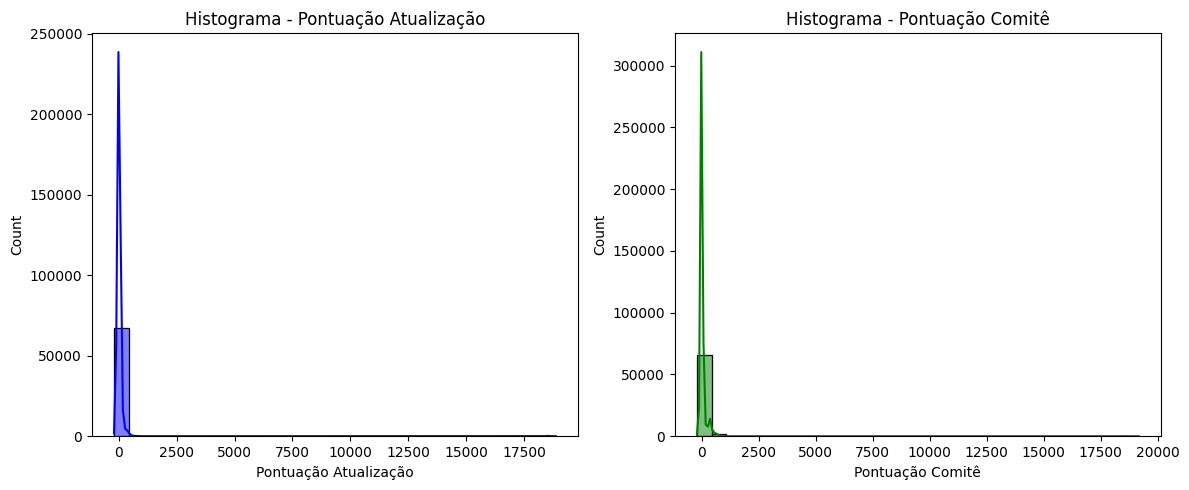

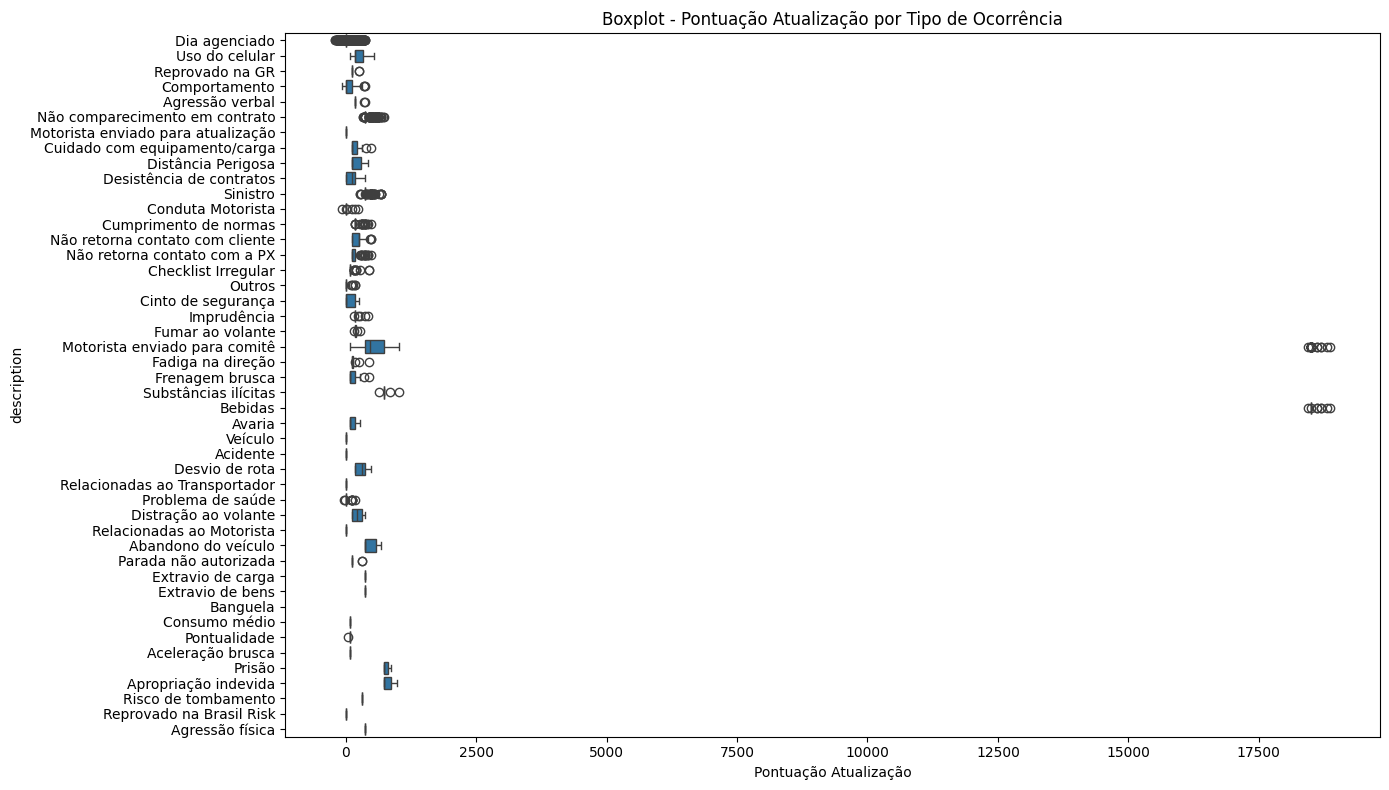

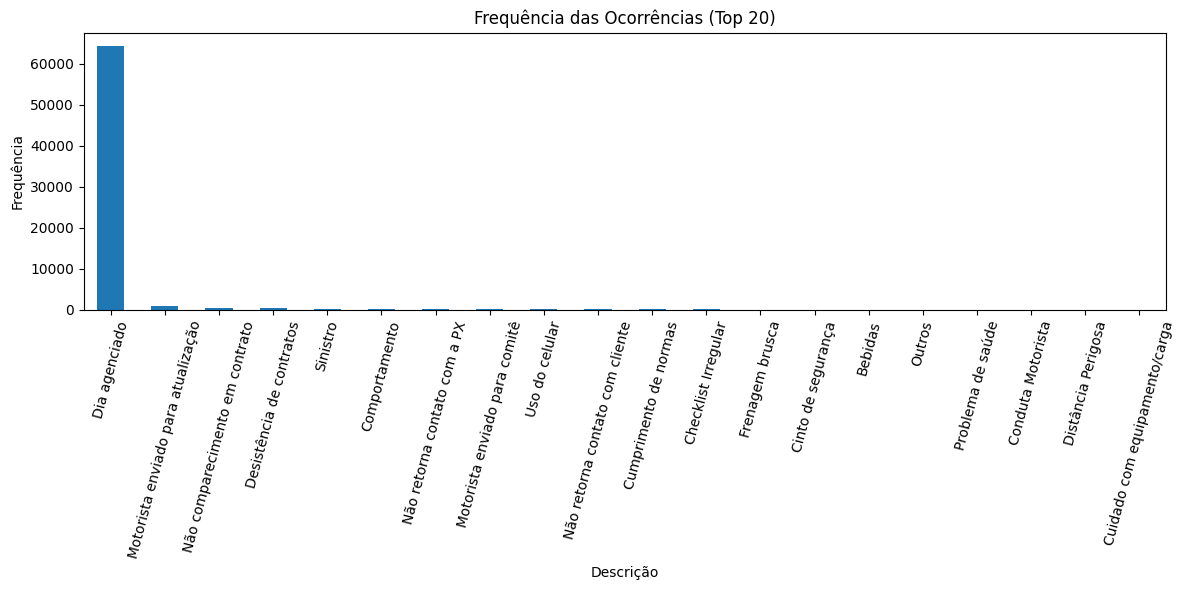

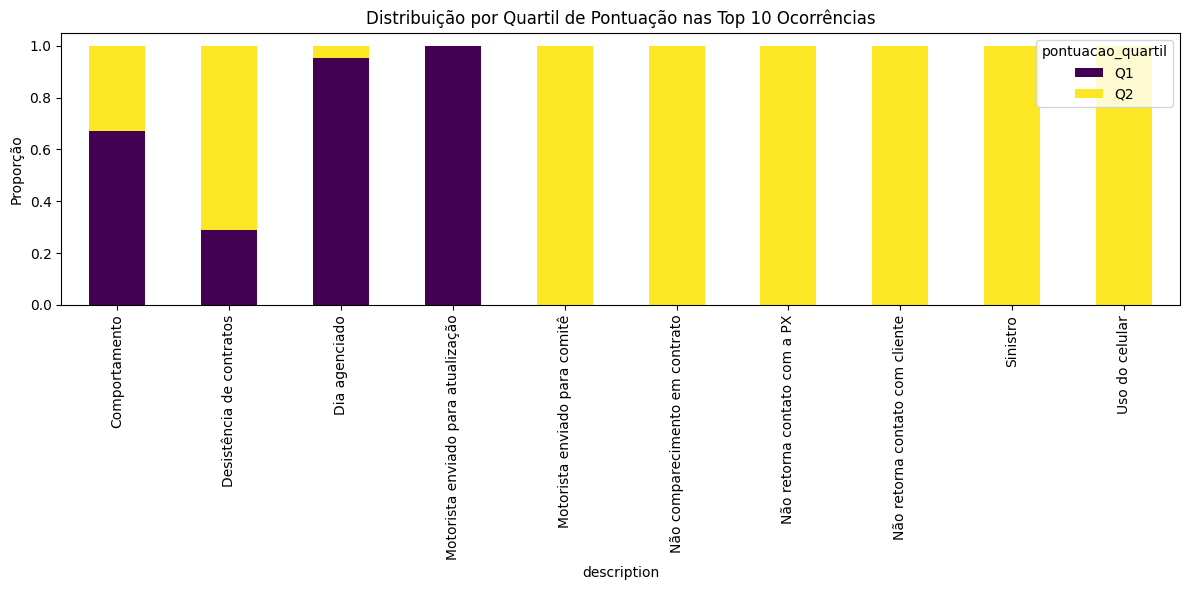

/tmp/ipykernel_44508/945602024.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('occurence_create').resample('M')['Pontuação Atualização'].mean().plot(figsize=(12, 5))


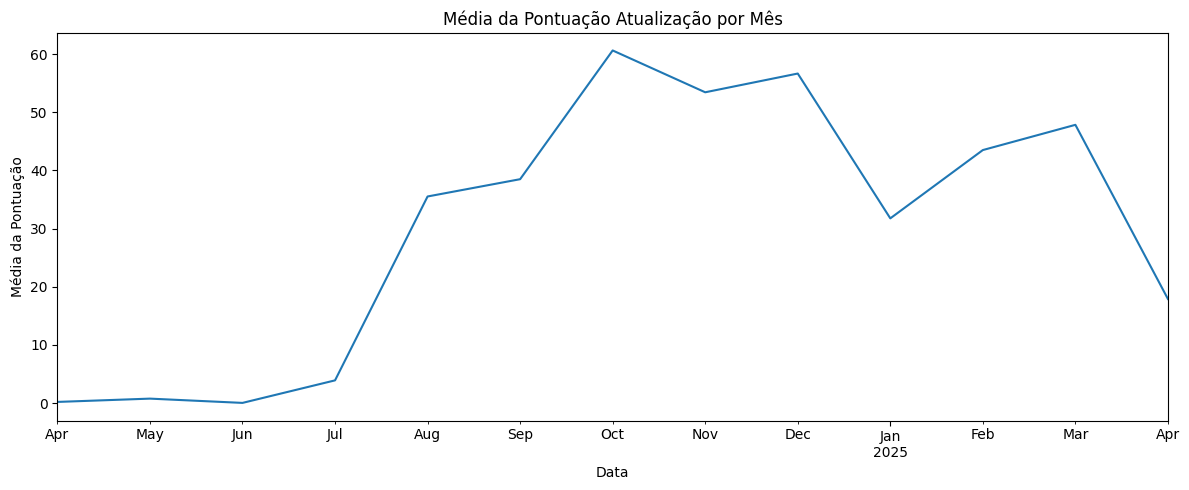

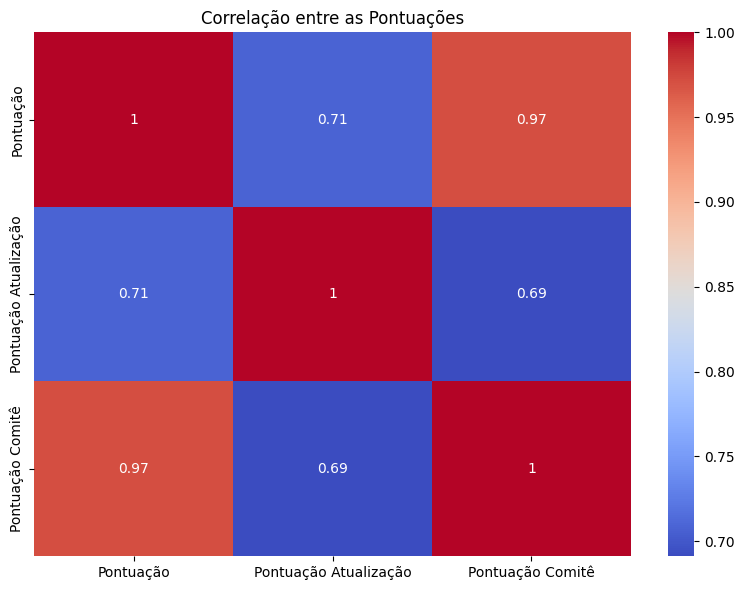

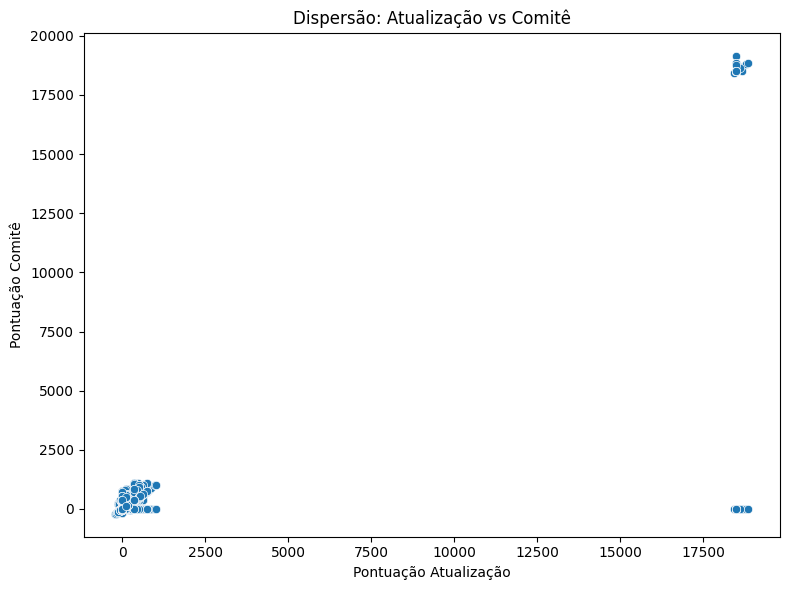

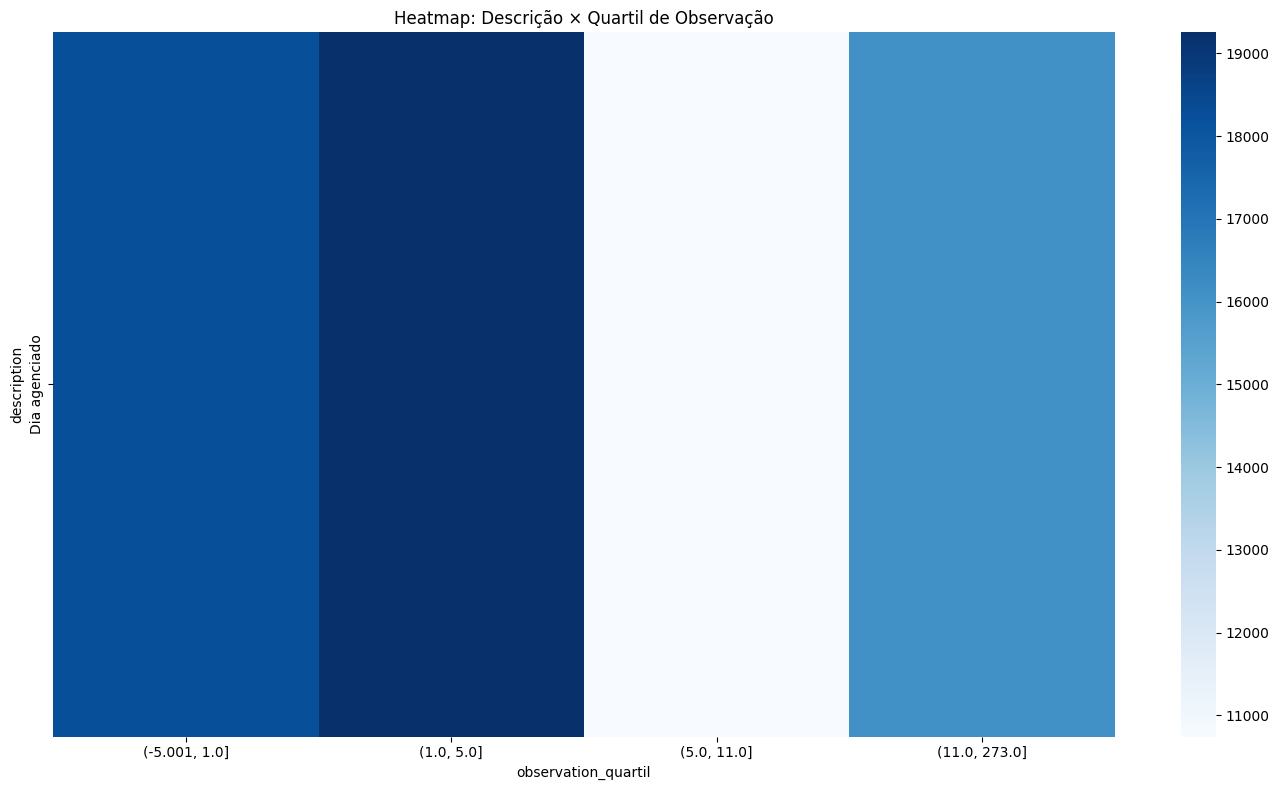

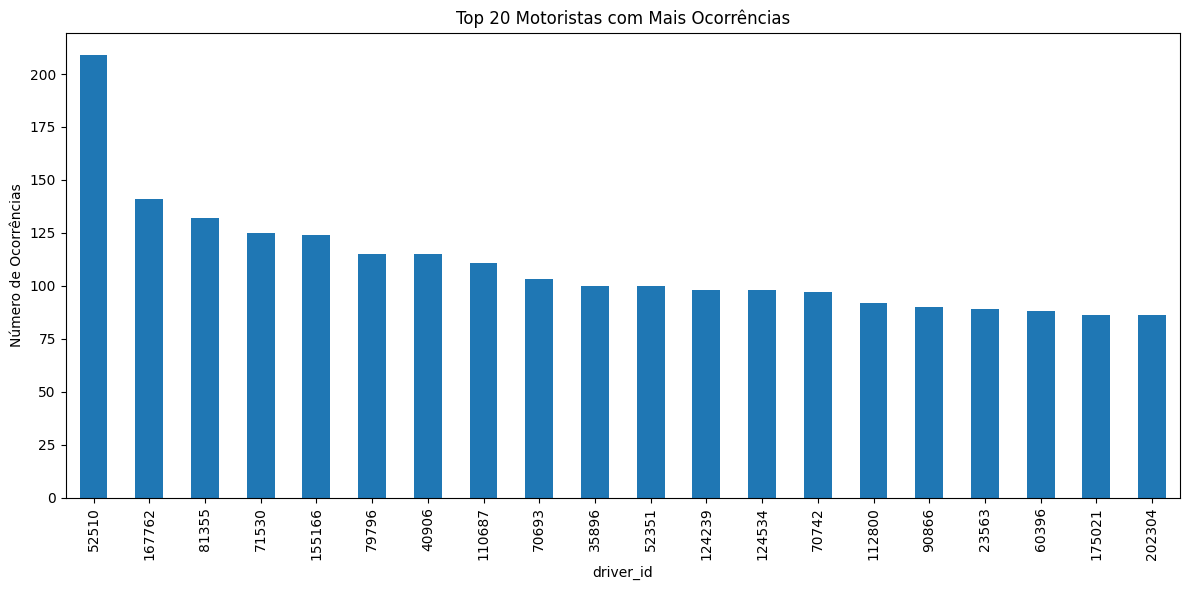

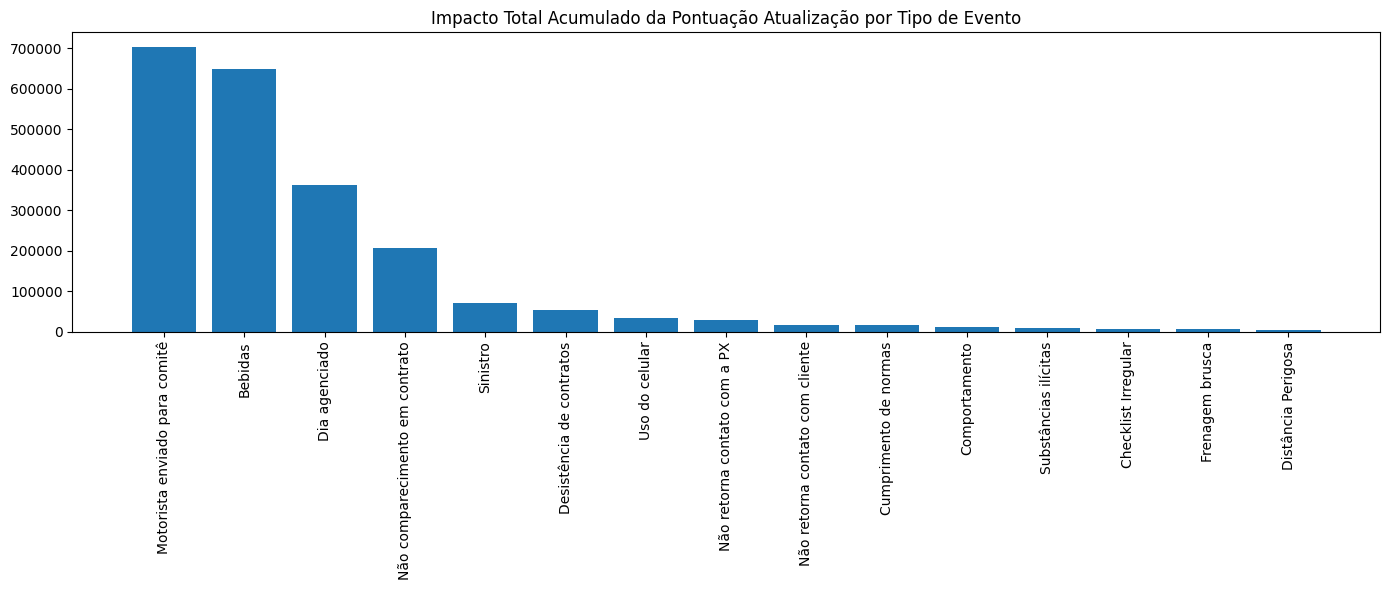

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar o DataFrame original
df = df_original.copy()

# Conversões e limpeza inicial
df['Pontuação'] = pd.to_numeric(df['Pontuação'], errors='coerce')
df['occurence_create'] = pd.to_datetime(df['occurence_create'], errors='coerce')
df['Pontuação Atualização'] = pd.to_numeric(df['Pontuação Atualização'], errors='coerce')
df['Pontuação Comitê'] = pd.to_numeric(df['Pontuação Comitê'], errors='coerce')

# Criar variável categórica por quartis de pontuação (com tratamento de erro)
try:
    pontuacoes_validas = df['Pontuação Atualização'].dropna()
    bin_edges = pd.qcut(pontuacoes_validas, q=4, retbins=True, duplicates='drop')[1]
    label_count = len(bin_edges) - 1
    labels = [f"Q{i+1}" for i in range(label_count)]
    df['pontuacao_quartil'] = pd.qcut(df['Pontuação Atualização'], q=label_count, labels=labels, duplicates='drop')
except Exception as e:
    print("Erro ao criar quartis de pontuação:", e)
    df['pontuacao_quartil'] = None

# Criar quartis de observation se possível
try:
    df['observation_quartil'] = pd.qcut(pd.to_numeric(df['observation'], errors='coerce'), q=4, duplicates='drop')
except:
    df['observation_quartil'] = None

# Função para exibir todos os gráficos sequencialmente
def gerar_graficos(df):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Pontuação Atualização'].dropna(), kde=True, color='blue', bins=30)
    plt.title('Histograma - Pontuação Atualização')

    plt.subplot(1, 2, 2)
    sns.histplot(df['Pontuação Comitê'].dropna(), kde=True, color='green', bins=30)
    plt.title('Histograma - Pontuação Comitê')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='Pontuação Atualização', y='description')
    plt.title('Boxplot - Pontuação Atualização por Tipo de Ocorrência')
    plt.tight_layout()
    plt.show()

    # Frequência de cada descrição
    plt.figure(figsize=(12, 6))
    df['description'].value_counts().head(20).plot(kind='bar')
    plt.title('Frequência das Ocorrências (Top 20)')
    plt.xlabel('Descrição')
    plt.ylabel('Frequência')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

    # Barras empilhadas: top 10 descrições por quartil
    if df['pontuacao_quartil'].notna().any():
        top10_desc = df['description'].value_counts().head(10).index
        temp = df[df['description'].isin(top10_desc)]
        crosstab = pd.crosstab(temp['description'], temp['pontuacao_quartil'], normalize='index')
        crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
        plt.title('Distribuição por Quartil de Pontuação nas Top 10 Ocorrências')
        plt.ylabel('Proporção')
        plt.tight_layout()
        plt.show()

    # Linha temporal por mês
    df.set_index('occurence_create').resample('M')['Pontuação Atualização'].mean().plot(figsize=(12, 5))
    plt.title('Média da Pontuação Atualização por Mês')
    plt.ylabel('Média da Pontuação')
    plt.xlabel('Data')
    plt.tight_layout()
    plt.show()

    # Heatmap de correlação
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['Pontuação', 'Pontuação Atualização', 'Pontuação Comitê']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlação entre as Pontuações')
    plt.tight_layout()
    plt.show()

    # Dispersão
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Pontuação Atualização', y='Pontuação Comitê', data=df)
    plt.title('Dispersão: Atualização vs Comitê')
    plt.tight_layout()
    plt.show()

    # Heatmap de contingência
    if df['observation_quartil'].notna().any():
        cont_table = pd.crosstab(df['description'], df['observation_quartil'])
        plt.figure(figsize=(14, 8))
        sns.heatmap(cont_table, annot=False, cmap='Blues')
        plt.title('Heatmap: Descrição × Quartil de Observação')
        plt.tight_layout()
        plt.show()

    # Top 20 motoristas por número de eventos
    plt.figure(figsize=(12, 6))
    df['driver_id'].value_counts().head(20).plot(kind='bar')
    plt.title('Top 20 Motoristas com Mais Ocorrências')
    plt.xlabel('driver_id')
    plt.ylabel('Número de Ocorrências')
    plt.tight_layout()
    plt.show()

    # Gráfico de cascata
    import numpy as np
    impacto = df.groupby('description')['Pontuação Atualização'].sum().sort_values(ascending=False).head(15)
    fig, ax = plt.subplots(figsize=(14, 6))
    bars = plt.bar(impacto.index, impacto.values)
    plt.xticks(rotation=90)
    plt.title('Impacto Total Acumulado da Pontuação Atualização por Tipo de Evento')
    plt.tight_layout()
    plt.show()

# Executar visualizações
gerar_graficos(df)
